In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import sys, os, import_ipynb
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Moduly.Preprocesing import normalizacja

In [4]:
dane_dc_genes=pd.read_csv("Dane/Omega/GCF_000008685_dc_genes.csv",sep='\t')

In [5]:
przyciete_dc_pd=dane_dc_genes[["seq_name","reg0_F","reg1_F","reg2_F"]]
przyciete_dc=przyciete_dc_pd[["reg0_F","reg1_F","reg2_F"]].__array__().T

In [6]:
przyciete_dc

array([[1.03773818, 1.20105626, 1.03451685, ..., 1.04029232, 1.16049643,
        1.22820873],
       [1.09944192, 1.02350719, 1.00196885, ..., 0.96033938, 1.01768147,
        1.09312783],
       [0.95340004, 1.04415317, 1.06705578, ..., 0.97702873, 1.17757882,
        1.12841552]])

# Omega

### Proste

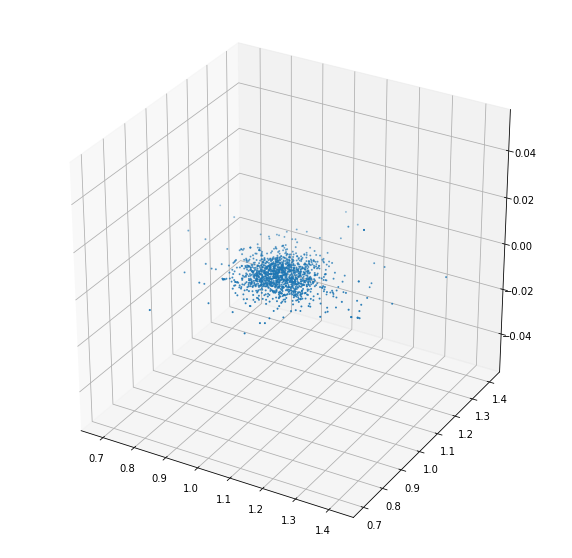

In [7]:
fig=plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111, projection='3d')
plt.scatter(przyciete_dc_pd["reg0_F"],przyciete_dc_pd["reg1_F"],przyciete_dc_pd["reg2_F"])

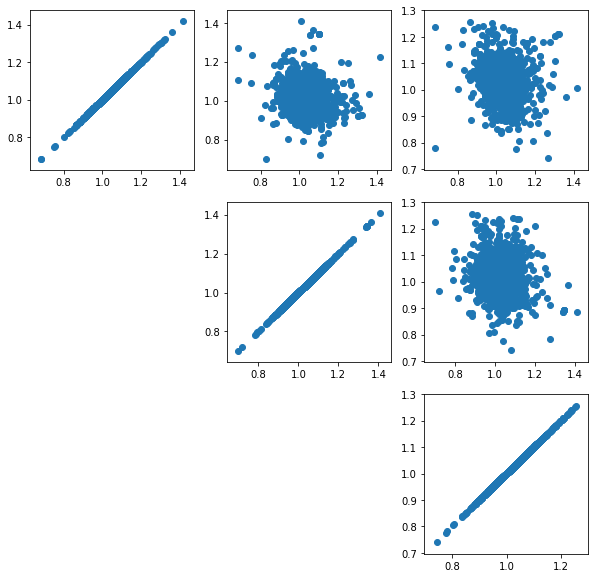

In [8]:
plt.gcf().set_size_inches(10,10)
for i in range(3):
    for j in range(i,3):
        plt.subplot(3,3,i*3+j+1)
        plt.scatter(przyciete_dc[i],przyciete_dc[j])

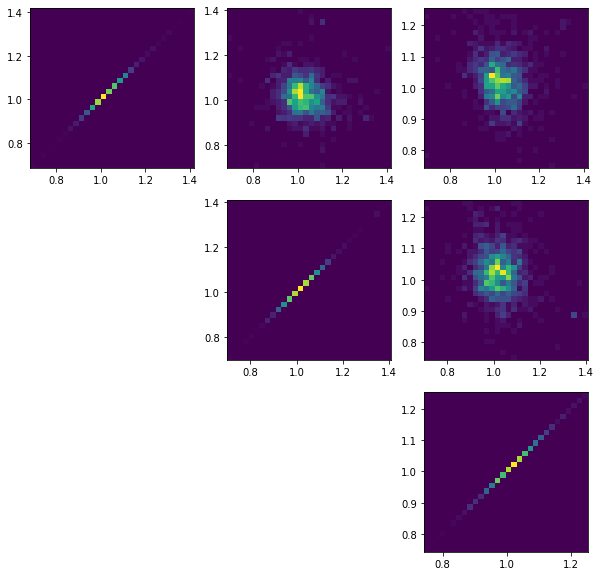

In [82]:
plt.gcf().set_size_inches(10,10)
for i in range(3):
    for j in range(i,3):
        plt.subplot(3,3,i*3+j+1)
        plt.hist2d(przyciete_dc[i],przyciete_dc[j],bins=30)

### Znormalizowane

In [9]:
przyciete_dc_norm=normalizacja(przyciete_dc)

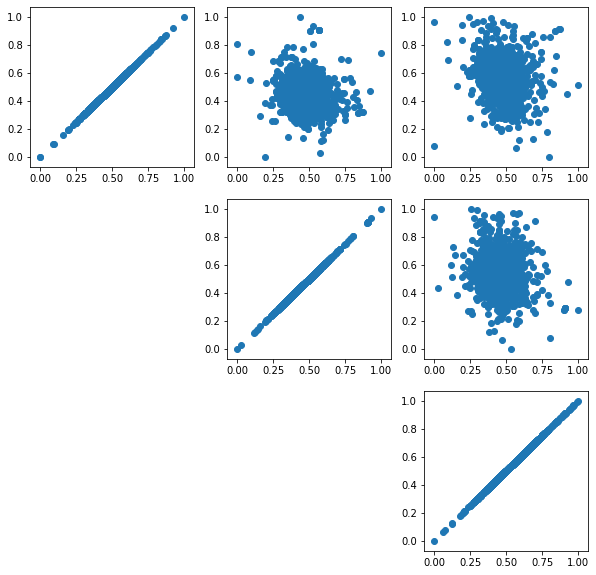

In [10]:
plt.gcf().set_size_inches(10,10)
for i in range(3):
    for j in range(i,3):
        plt.subplot(3,3,i*3+j+1)
        plt.scatter(przyciete_dc_norm[i],przyciete_dc_norm[j])

### PCA

In [11]:
pca=PCA(n_components=2)
zredukowane_dc=pca.fit_transform(przyciete_dc.T).T

plt.scatter(zredukowane_dc[0],zredukowane_dc[1])

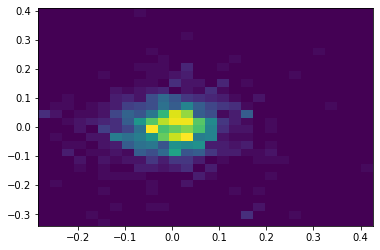

In [87]:
plt.hist2d(zredukowane_dc[0],zredukowane_dc[1],bins=28)
plt.show()

### TSNE

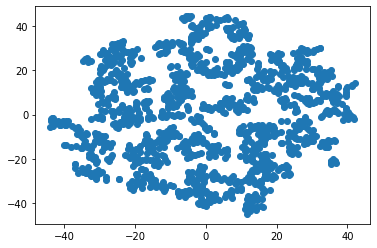

In [46]:
tsne=TSNE()
tsneWynik=tsne.fit_transform(przyciete_dc.T).T

plt.scatter(tsneWynik[0],tsneWynik[1])

### TSNE - próby

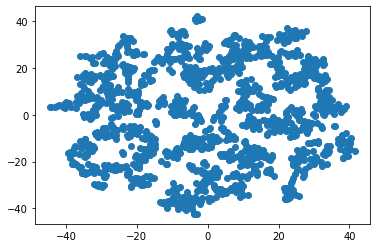

In [50]:
tsne=TSNE(learning_rate=100)
tsneWynik=tsne.fit_transform(przyciete_dc.T).T

plt.scatter(tsneWynik[0],tsneWynik[1])

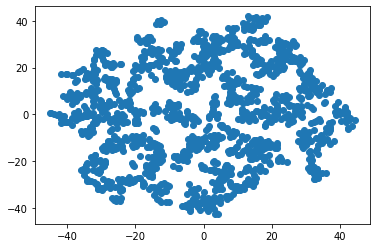

In [61]:
tsne=TSNE(learning_rate=150)
tsneWynik=tsne.fit_transform(przyciete_dc.T).T

plt.scatter(tsneWynik[0],tsneWynik[1])

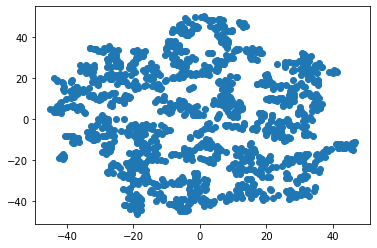

In [62]:
tsne=TSNE(learning_rate=150,perplexity=25)
tsneWynik=tsne.fit_transform(przyciete_dc.T).T

plt.scatter(tsneWynik[0],tsneWynik[1])

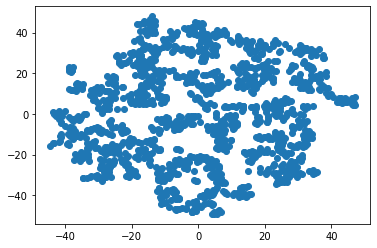

In [65]:
tsne=TSNE(learning_rate=150,perplexity=27)
tsneWynik=tsne.fit_transform(przyciete_dc.T).T

plt.scatter(tsneWynik[0],tsneWynik[1])

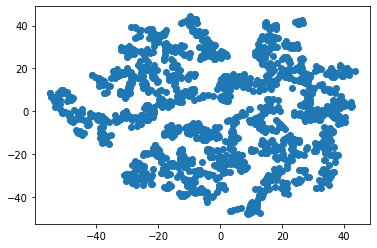

In [73]:
tsne=TSNE(learning_rate=700,perplexity=27)
tsneWynik=tsne.fit_transform(przyciete_dc.T).T

plt.scatter(tsneWynik[0],tsneWynik[1])

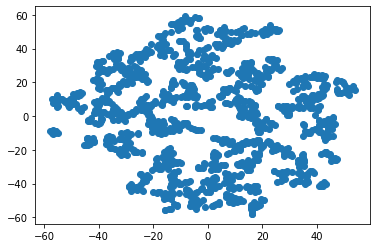

In [78]:
tsne=TSNE(learning_rate=700,perplexity=20)
tsneWynik=tsne.fit_transform(przyciete_dc.T).T

plt.scatter(tsneWynik[0],tsneWynik[1])

# Różnice

In [15]:
roznice_dc_genes_org=pd.read_csv("Dane/Roznice/GCF_000008685_dc_genes.csv",sep='\t')

In [33]:
roznice_dc_genes=roznice_dc_genes_org[["type", "reg0_freq_normal","reg1_freq_normal","reg2_freq_normal"]]

In [34]:
roznice_dc_genes

type  reg0_freq_normal  reg1_freq_normal  reg2_freq_normal
0     dangerous_codons          0.175909          0.044213          0.017179
1             with_alt          0.003252          0.017389          0.019125
2               no_alt          0.172657          0.026824         -0.001946
3        double_danger          0.066807          0.016955         -0.012559
4     dangerous_codons          0.129280          0.032789         -0.019843
...                ...               ...               ...               ...
5559     double_danger          0.054466         -0.023183          0.092927
5560  dangerous_codons          0.032381          0.151428          0.175238
5561          with_alt          0.182840          0.033489          0.087601
5562            no_alt         -0.150459          0.117939          0.087636
5563     double_danger          0.093915         -0.007817          0.141534

[5564 rows x 4 columns]

In [35]:
roznice_dc_genes=roznice_dc_genes[["reg0_freq_normal","reg1_freq_normal","reg2_freq_normal"]].__array__().reshape((-1,12)).T

In [37]:
np.shape(roznice_dc_genes)

(12, 1391)

### Zwykle

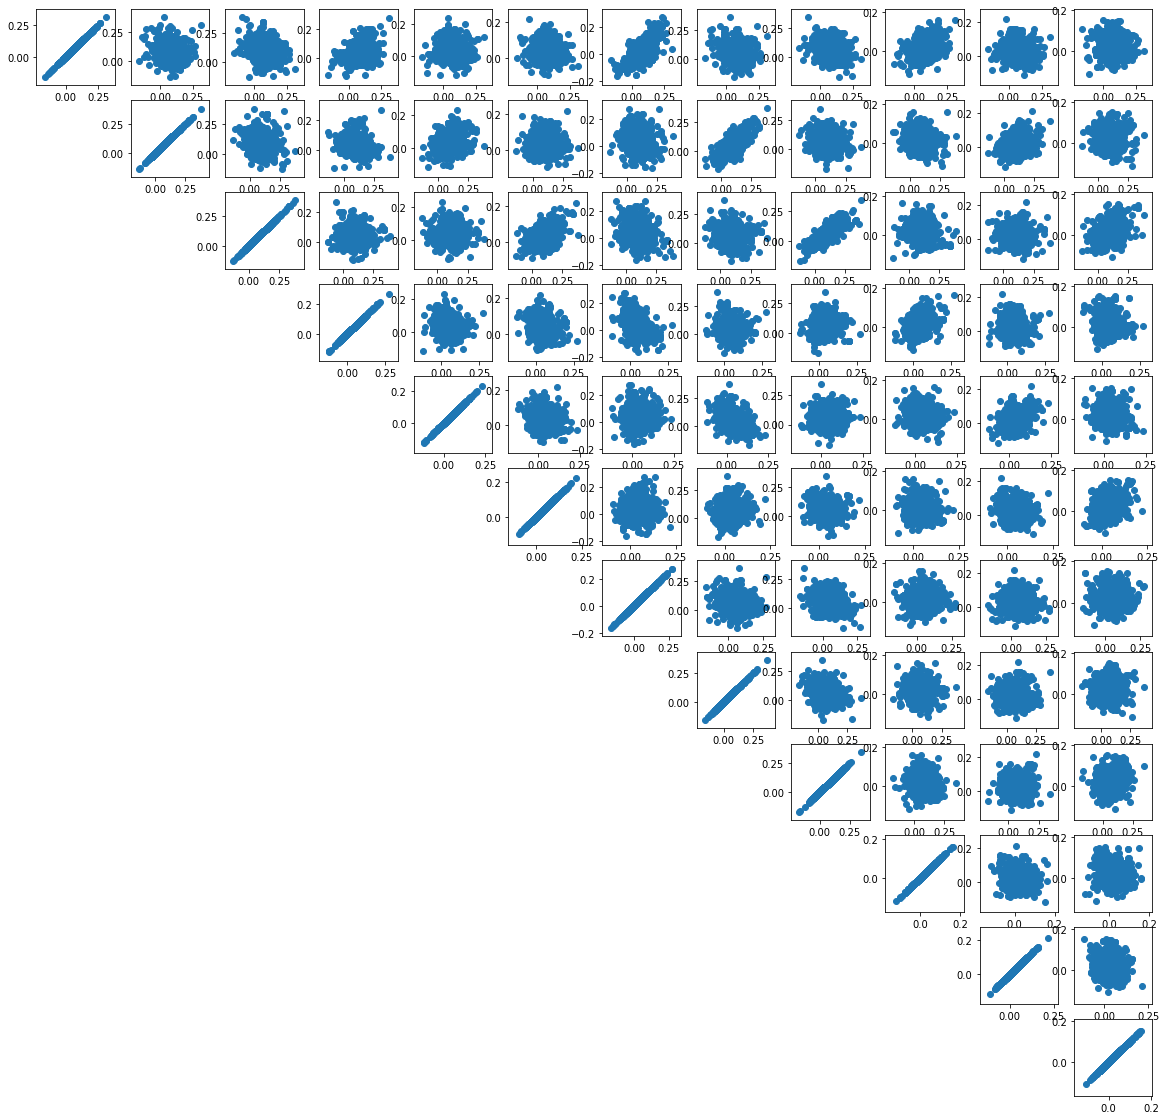

In [39]:
plt.gcf().set_size_inches(20,20)
for i in range(12):
    for j in range(i,12):
        plt.subplot(12,12,i*12+j+1)
        plt.scatter(roznice_dc_genes[i],roznice_dc_genes[j])

### PCA

In [42]:
pca=PCA(n_components=2)
roz_pca_wynik=pca.fit_transform(roznice_dc_genes.T).T

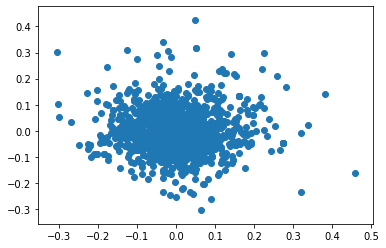

In [43]:
plt.scatter(roz_pca_wynik[0],roz_pca_wynik[1])

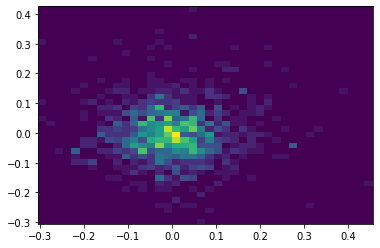

In [94]:
plt.hist2d(roz_pca_wynik[0],roz_pca_wynik[1],bins=40)
plt.show()

### TSNE

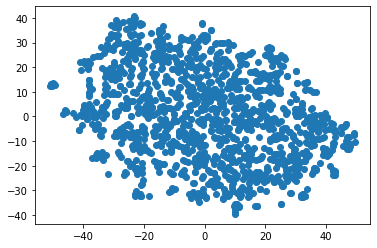

In [64]:
tsne=TSNE()
rozTsneWynik=tsne.fit_transform(roznice_dc_genes.T).T

plt.scatter(rozTsneWynik[0],rozTsneWynik[1])

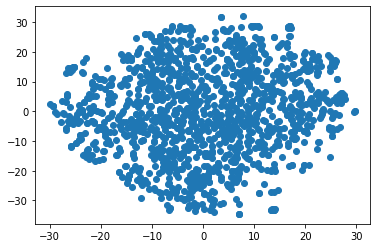

In [103]:
tsne=TSNE(perplexity=50, learning_rate=700)
rozTsneWynik=tsne.fit_transform(roznice_dc_genes.T).T

plt.scatter(rozTsneWynik[0],rozTsneWynik[1])